In [1]:
# we will work with iris flowers dataset


# 1.Import libraries

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 2.Load the dataset


In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
dataset.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Summarize the Dataset 


In [12]:
# تلخيص البيانات
'''
في هذه الخطوة ، سنلقي نظرة على البيانات بعدة طرق مختلفة:

أبعاد مجموعة البيانات.
نظرة خاطفة على البيانات نفسها.
ملخص إحصائي لجميع السمات.
تفصيل البيانات حسب متغير الفئة.
'''
# 1 - Dimensions of Dataset
# how many instances (rows) and how many attributes (columns) the data contains
dataset.shape  # (150 rows, 5 col) 

# 2 - Peek at the Data
dataset.head()

# 3 - Statistical Summary  الملخص الاحصائي
dataset.describe()
# This includes the count,mean,min and max values as well as some percentiles.

# 4 - Class Distribution
dataset.groupby('class').size()
# عدد الحالات (الصفوف) التي تنتمي إلى كل فئة.



class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 4. Data Visualization

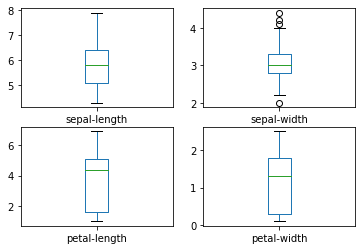

In [21]:
# .1 Univariate Plots
# that is, plots of each individual variable.
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2),
             sharex=False, sharey=False)
pyplot.show()

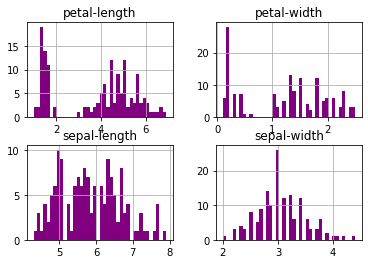

In [34]:
# We can also create a histogram of each input variable to get
# an idea of the distribution.
# histograms
dataset.hist(bins=40, color='purple')
pyplot.show()

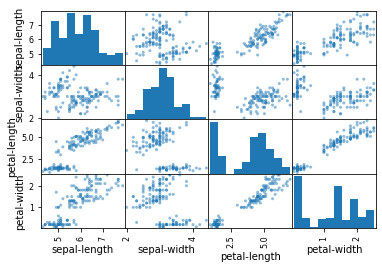

In [37]:
#  .2 Multivariate Plots
#  التفاعلات بين المتغيرات
# التجميع القطري لبعض أزواج السمات يشير إلى وجود علاقة عالية وعلاقة يمكن التنبؤ بها

# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()


# 5. Evaluate Some Algorithms


In [131]:
# now we'll create some models of the data 
# and estimate their accuracy on unseen data.
'''
اولا
افصل مجموعة بيانات التحقق من الصحة.
إعداد تسخير الاختبار لاستخدام التحقق من صحة 10 أضعاف.
بناء نماذج مختلفة متعددة للتنبؤ الأنواع من قياسات الزهور
اختيار أفضل نموذج.
'''
# 1 - Create a Validation Dataset
# نريد تقديرًا أكثر دقة لدقة أفضل نموذج على البيانات غير المرئية من خلال تقييمه على البيانات
# غير المرئية الفعلية

# أي أننا سنحجب بعض البيانات التي لن تتمكن الخوارزميات من رؤيتها
#وسوف نستخدم هذه البيانات للحصول على فكرة ثانية ومستقلة عن مدى دقة النموذج الأفضل

'''
We will split the loaded dataset into two, 80% of which we will use to train,
evaluate and select among our models,
and 20% that we will hold back as a validation dataset.
'''
array = dataset.values
x = array[:,0:4]  # [all rows:from col0 :to col3]
# جميع الاعمده ماعدا اسماء الزهرات
y = array[:,4]  # [all rows:col4]
# اسماء الزهرات
x_train, x_validation, y_train, y_validation = train_test_split(x, y,
                                                                test_size=0.20)
# نقسم الاكس الى قسمين للتدرب وللاختبار
# نقسم الواي الي قسمين للتدرب وللاختبار
y_validation

# You now have training data in the X_train and Y_train for preparing models 
# and a X_validation and Y_validation sets that we can use later.

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [194]:
# 2 - Test Harness

# 3 - Build Models
'''
Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
'''
# Spot Check Algorithms
# طرق مختلفه لبناء المودل 
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# تشغيل جميع المودل
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train,
                                 cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.055902)
LDA: 0.983333 (0.033333)
KNN: 0.950000 (0.040825)
CART: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


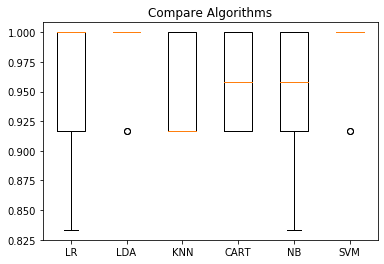

In [195]:
# (SVM  model) أكبر درجة دقة تقديرية عند حوالي 0.98 أو 98

# يمكننا أيضًا إنشاء مخطط لنتائج تقييم النموذج ومقارنة الفرق والدقة المتوسطة لكل نموذج.
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Compare Algorithms')
pyplot.show()

# 6.Make Predictions

In [146]:
# We must choose an algorithm to use to make predictions.
# SVM was the most accurate model. 

# Now we want to get an idea of the accuracy of the model on our validation set.

# 1 - Make Predictions
# We can fit the model on the entire training dataset and make predictions on 
# the validation dataset
model = SVC(gamma='auto')
model.fit(x_train, y_train) # نقوم بتدريبه على المجموعات الخاصه بالتدرب
prediction = model.predict(x_validation)  # نريده ان يقوم بالتوقع بناء على اسماء الزهرات
prediction


array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [187]:
model.predict([[0.2, 1.5, 3.1, 4.6]])

array(['Iris-virginica'], dtype=object)

In [ ]:
#end

In [193]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [134]:
# 2 - Evaluate Predictions تقييم التوقعات

# We can evaluate the predictions by comparing them 
# to the expected results in the validation set

accuracy_score(y_validation, prediction)
# مدى صحة التوقعات التي قام بها المودل تقريبا 93 بالمئه

print(classification_report(y_validation, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



# another solution

In [31]:
from sklearn import datasets
from numpy import array
iris = datasets.load_iris()
x = iris.data
y = iris.target # numbers of iris's names
#y = array([iris.target_names[v] for v in iris.target])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [5]:
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
x_train, x_test, y_train, y_test = (train_test_split(x, y,
                                                  test_size=0.25,
                                                  random_state=33))
# Standardize the features
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [108]:
from sklearn import linear_model
clf = linear_model.SGDClassifier()
clf.fit(x_train, y_train)
SGDClassifier()
pred = clf.predict(x_train)
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 0])

In [110]:
y_train

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 0])

In [105]:
import sklearn.metrics as met
print(met.accuracy_score(y_train, pred))

0.9642857142857143


Text(0, 0.5, 'Sepal width')

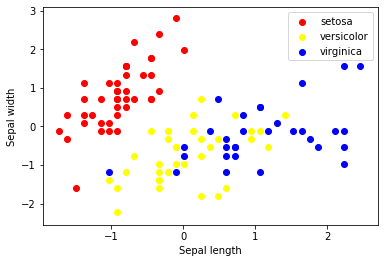

In [22]:
import matplotlib.pyplot as plt
colors = ['red', 'yellow', 'blue']
for i in range(len(colors)):
    xs = x_train[:, 0][y_train == i]
    ys = x_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [20]:
clf.coef_

array([[ -8.78163007,  11.31454704, -12.45128396, -11.22699752],
       [ -3.0324825 ,  -7.66731487,  20.74889427, -11.15114395],
       [ -3.54352409,  -1.89349094,  32.08841507,  33.4842933 ]])

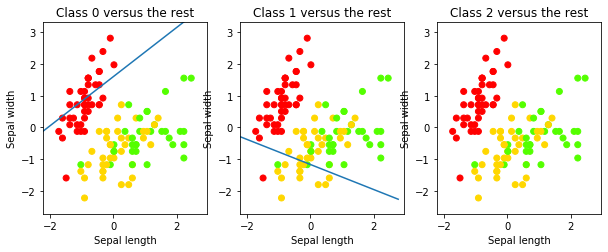

In [23]:
import numpy as np
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() +.5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() +.5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,
    cmap=plt.cm.prism)
    ys = (-clf.intercept_[i]  - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys) 

# Image recognition with Support Vector Machines

In [4]:
from sklearn.datasets import fetch_olivetti_faces
# load faces data
faces = fetch_olivetti_faces()

In [5]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [116]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [125]:
faces.images.shape

(400, 64, 64)

In [133]:
np.max(faces.data)

1.0

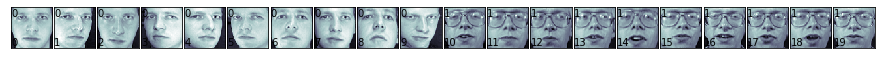

In [9]:
import matplotlib.pyplot as plt
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
print_faces(faces.images, faces.target, 20)

# Training a Support Vector Machine

In [10]:
from sklearn.svm import SVC
# The Support Vector Classifier (SVC) will be used for classification
# لتحليل الصور
# kerne defines the kernel function to be used in our classifier 
svc_1 = SVC(kernel='linear')
# Before continuing, we will split our dataset into training 
# and testing datasets.
x_train, x_test, y_train, y_test =  train_test_split(faces.data,
                                                     faces.target
                                                     , test_size=0.25,
                                                     random_state=0)


In [20]:
# And we will define a function to evaluate K-fold cross-validation
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate(clf, x, y, k):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), k, shuffle=F, random_state=0)
    # by default the score used is the one returned by score
    # method of the estimator (accuracy)
    scores = cross_val_score(clf, x, y, cv=cv)
    print(scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))
    
evaluate(svc_1, x_train, y_train, 5)

SyntaxError: positional argument follows keyword argument (<ipython-input-20-9c9cf8885140>, line 7)

# another try

In [26]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv")
dataset.columns = (['sepal-length','sepal-width','petal-length','petal-width','class'])
# ['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
new = {
    'sepal-length':'5.1',
    'sepal-width':'3.5',
    'petal-length':'1.4',
    'petal-width':'0.2',
    'class':'Iris-setosa'
}
df = dataset + new

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')